In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.textpath import TextPath
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_csv('../dataset/complete_dataset.csv')
#dfs is the original dataframe without slicing, since df would be used as a sliced dataframe later on 
dfs = df.sample(frac=1)
dfs.shape


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,5,6,7,8,9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(10927181, 19)

## Visualisation of the Dataframe

### **Original Dataframe**

In [3]:
print(dfs.shape)
dfs.head()

(10927181, 19)


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
9681088,NaN,NaN,tt8303598,NaN,NaN,NaN,NaN,NaN,nm1145806,"nm1354318,nm0734570",tvEpisode,Episode #1.184,Episode #1.184,0.0,1989.0,NaN,NaN,NaN,NaN
717825,NaN,NaN,tt0435912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,Working a Long Tom Rocker on Bonanza Creek,Working a Long Tom Rocker on Bonanza Creek,0.0,1903.0,NaN,NaN,NaN,NaN
2305922,NaN,NaN,tt10766496,NaN,NaN,NaN,NaN,NaN,"nm10894328,nm10732632,nm10875531",NaN,short,Time Away,Time Away,0.0,2017.0,NaN,4,NaN,NaN
14410,5532810.xml,"Alexandros , kommst du mit auf die Insel ? - W...",tt156794,Drama,1998.0,"Greek, English, Italian",untokenisiert,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5524469,NaN,NaN,tt2533374,NaN,NaN,NaN,NaN,NaN,"nm0024063,nm2605840,nm3861808","nm0103819,nm4263577,nm2384839,nm2405419,nm1757...",tvEpisode,Episode dated 6 November 2012,Episode dated 6 November 2012,0.0,2012.0,NaN,NaN,NaN,NaN


### **Dataframe without NaN in text, genre, year and production_region**

In [4]:
df.dropna(subset=['text', 'genre', 'year', 'production_region'], inplace=True)
df.drop_duplicates(subset=['IMDB_ID'], inplace=True)
print(df.shape)
df.head()

(11557, 19)


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,tt6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,tt6548,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",tt6684,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,tt7613,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot Production 

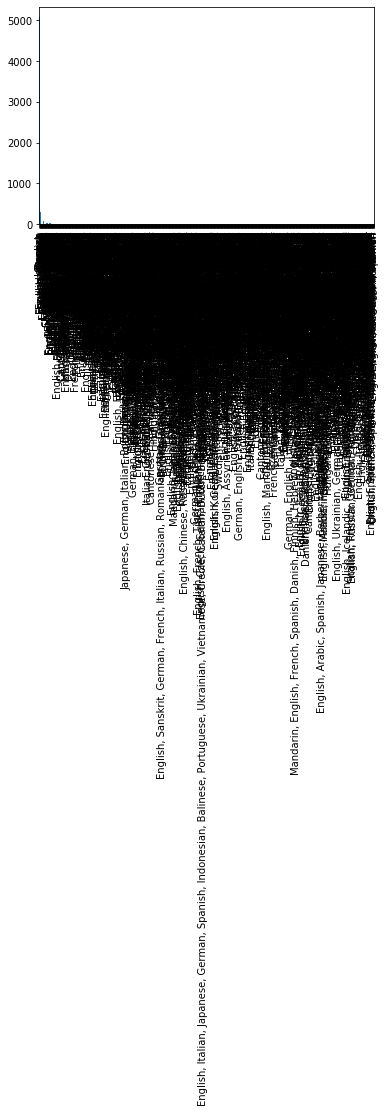

In [5]:
pd.value_counts(df['production_region']).plot.bar()

# Plot Main Country (the first country mentioned on each rows)

In [6]:
df['main_country'] = df.production_region.str.split(',')
main = df['main_country']
main_country = main.apply(lambda x: x[0])
df['main_country'] = main_country
df[df['production_region'].str.contains(" Old")]


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_country
17204,116716.xml,DER HERR DER RINGE DIE ZWEI TÜRME SPECIAL EXTE...,tt167261,"Action,Adventure,Drama",2002.0,"English, Sindarin, Old English",untokenisiert,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
18136,226752.xml,Der Herr der Ringe Sméagol ! Ich hab einen ! I...,tt167260,"Adventure,Drama,Fantasy",2003.0,"English, Quenya, Old English, Sindarin",untokenisiert,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
23661,6858525.xml,Hrothgar ! Hrothgar ! Hrothgar ! Ich will Met ...,tt442933,"Action,Adventure,Animation",2007.0,"English, Old English",untokenisiert,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
27121,4994297.xml,Outlander ( 2008 ) dTV - kabel eins - 6. April...,tt462465,"Action,Adventure,Sci-Fi",2008.0,"English, Norse, Old, Latin",untokenisiert,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English


In [7]:
df.main_country

109       French
110      English
111      English
113      English
116      English
          ...   
59644    English
59646    English
59654    English
59664    English
59666    English
Name: main_country, Length: 11557, dtype: object

In [8]:
df.main_country.unique()
print(df.main_country.unique())
len(df.main_country.unique())

['French' 'English' 'Swedish' 'German' 'Slovak' 'Russian' 'Polish'
 'Spanish' 'Portuguese' 'Czech' 'Danish' 'Croatian' 'Italian' 'Japanese'
 'Swiss German' 'Romanian' 'Georgian' 'Dutch' 'Turkish' 'Bulgarian'
 'Ukrainian' 'Mandarin' 'Urdu' 'Estonian' 'Hebrew' 'Serbo-Croatian'
 'Greek' 'Norwegian' 'Korean' 'Cantonese' 'Finnish' 'Arabic' 'Icelandic'
 'Serbian' 'Belarusian' 'Saami' 'Scanian' 'Bambara' 'Azerbaijani'
 'Hungarian' 'Afrikaans' 'Faroese' 'Lithuanian' 'Hindi' 'More'
 'Vietnamese' 'Bosnian' 'Persian' 'Romany' 'Khmer' 'Tamil' 'Tibetan'
 'Catalan' 'Kurdish' 'Thai' 'Wolof' 'Aboriginal' 'Slovenian' 'Dari'
 'Aramaic' 'Panjabi' 'Kazakh' 'Mongolian' 'Zulu' 'Maya' 'Hokkien'
 'Flemish' 'Filipino' 'Kirghiz' 'Irish' 'Inupiaq' 'Min Nan' 'Neapolitan'
 'Indonesian' 'Chinese' 'Greenlandic' 'Ladakhi' 'Albanian' 'Malay'
 'Inuktitut' 'Maori' 'Telugu']


82

In [9]:
from collections import Counter
main_country_frequs = Counter(df.main_country)
print('There are', len(main_country_frequs), 'main Countries where the Movies are produced')
main_country_frequs.most_common(20)

There are 82 main Countries where the Movies are produced


[('English', 6862),
 ('French', 1109),
 ('German', 981),
 ('Japanese', 471),
 ('Italian', 391),
 ('Spanish', 211),
 ('Cantonese', 167),
 ('Korean', 152),
 ('Mandarin', 151),
 ('Swedish', 144),
 ('Russian', 118),
 ('Danish', 83),
 ('Norwegian', 80),
 ('Turkish', 67),
 ('Dutch', 66),
 ('Polish', 45),
 ('Thai', 45),
 ('Hindi', 43),
 ('Czech', 38),
 ('Icelandic', 36)]

**Main Country Plot**

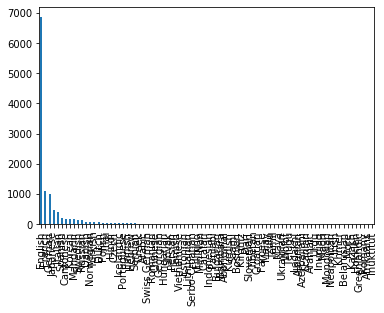

In [10]:
pd.value_counts(df['main_country']).plot.bar()


# Production Country

In [11]:
df.production_region.unique()
print(df.production_region.unique())

['French' 'English' 'Swedish' ... 'Chinese, English'
 'Spanish, English, Icelandic, Portuguese' 'Hebrew, English, Persian']


In [12]:
from collections import Counter
region_combination_frequs = Counter(df.production_region)
region_combination_frequs.most_common(20)

[('English', 5082),
 ('French', 799),
 ('German', 780),
 ('Japanese', 398),
 ('Italian', 306),
 ('English, Spanish', 252),
 ('English, French', 207),
 ('Spanish', 154),
 ('Korean', 119),
 ('English, German', 98),
 ('Mandarin', 95),
 ('Russian', 91),
 ('Swedish', 87),
 ('French, English', 82),
 ('English, Italian', 79),
 ('Cantonese', 79),
 ('English, Russian', 75),
 ('English, Japanese', 63),
 ('Turkish', 57),
 ('Danish', 52)]

In [13]:
region = df.production_region
region.head(30)

109             French
110            English
111            English
113            English
116            English
117            English
118            English
119            English
121            Swedish
123             German
125            English
127            Swedish
128             German
129            English
131             Slovak
132             German
133    Swedish, Danish
137             French
140            Russian
142            English
145            English
146            English
148             French
150            English
153            English
154             French
155            English
156            English
157             German
158            English
Name: production_region, dtype: object

In [14]:
#to find out the out the country names so we can tailor the language-continent dataframe
production_countries = []
for prod_country in df.production_region.unique():
    sign_languages = prod_country.replace ('Sign Languages', 'uncategorised')
    sign_language = sign_languages.replace (' Sign Language', '')
    language = sign_language.replace(' languages', '')
    each_country = language.split(', ')
    production_countries = production_countries + each_country
print('Number of countries mentioned in the Dataset: ', len(production_countries))
print(production_countries)    



Number of countries mentioned in the Dataset:  4082
['French', 'English', 'Swedish', 'German', 'Slovak', 'Swedish', 'Danish', 'Russian', 'Polish', 'German', 'English', 'English', 'French', 'Spanish', 'Arabic', 'Italian', 'Spanish', 'English', 'Hungarian', 'Latin', 'Spanish', 'Hungarian', 'English', 'Latin', 'Portuguese', 'English', 'German', 'French', 'English', 'Russian', 'English', 'Arabic', 'French', 'English', 'French', 'Cantonese', 'German', 'English', 'Italian', 'Russian', 'Spanish', 'German', 'English', 'Spanish', 'English', 'German', 'Italian', 'English', 'French', 'English', 'Polynesian', 'English', 'Italian', 'English', 'Cantonese', 'Latin', 'English', 'German', 'English', 'Arabic', 'Czech', 'English', 'Portuguese', 'French', 'German', 'English', 'Russian', 'English', 'Mandarin', 'English', 'Hebrew', 'French', 'English', 'English', 'German', 'French', 'Italian', 'English', 'Latin', 'German', 'English', 'Esperanto', 'English', 'Welsh', 'English', 'French', 'German', 'Italian',

In [15]:
a = []
for y in production_countries:
    if y not in a:
        a.append(y)
print(len(a))
print(a)


167
['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian', 'Belarusian', 'Guarani', 'Dari', 'Pushto', 'Saami', 'Scanian', 'Bambara', 'Fulah', 'Azerbaijani', 'Hakka', 'Afrik

In [16]:
from collections import Counter
print(len(production_countries))
g = Counter(production_countries)
g

4082


Counter({'French': 409,
         'English': 890,
         'Swedish': 75,
         'German': 363,
         'Slovak': 12,
         'Danish': 64,
         'Russian': 183,
         'Polish': 51,
         'Spanish': 229,
         'Arabic': 99,
         'Italian': 197,
         'Hungarian': 33,
         'Latin': 70,
         'Portuguese': 50,
         'Cantonese': 94,
         'Polynesian': 1,
         'Czech': 28,
         'Mandarin': 118,
         'Hebrew': 53,
         'Esperanto': 3,
         'Welsh': 3,
         'Serbian': 25,
         'Indonesian': 11,
         'Greek': 44,
         'Croatian': 7,
         'Nahuatl': 1,
         'Swahili': 12,
         'Japanese': 136,
         'Hindi': 34,
         'Swiss German': 16,
         'Athapascan': 1,
         'Romanian': 20,
         'Georgian': 13,
         'Navajo': 2,
         'Thai': 32,
         'American': 5,
         'Chinese': 26,
         'Dutch': 37,
         'Turkish': 39,
         'Arapaho': 1,
         'Romany': 3,
         'Bul

## Country to Continent conversion

**Importing the list of continent**

In [17]:
continent = pd.read_csv('../dataset/continent_languages.csv')
continent.head()

,north_america,south_america,europe,africa,asia,australia,antartica,uncategorised
0,English,Nahuatl,French,Swahili,Russian,Aboriginal,NaN,Latin
1,Athapascan,Brazilian,Swedish,Zulu,Arabic,Maori,NaN,Portuguese
2,American,Guarani,German,Bambara,Cantonese,NaN,NaN,Esperanto
3,Sioux,Aymara,Slovak,Fulah,Polynesian,NaN,NaN,Georgian
4,Apache,Quechua,Danish,Afrikaans,Mandarin,NaN,NaN,Navajo


## Main Region to Main Continent ##

In [18]:
df['main_continent'] = df.main_country

def conti(continent):
    na = []
    for land in continent:
        na.append(land)
    return na

north_america = conti(continent.north_america)
south_america = conti(continent.south_america)
europe = conti(continent.europe)
africa = conti(continent.africa)
asia = conti(continent.asia)
australia = conti(continent.australia)
antartica = conti(continent.antartica)
uncategorised = conti(continent.uncategorised)

c = []
for x in df.main_country:
    if x in north_america:
        c.append('North America')   
    elif x in south_america:
        c.append('South America')
    elif x in europe:
        c.append('Europe')
    elif x in africa:
        c.append('Africa')
    elif x in asia:
        c.append('Asia')
    elif x in australia:
        c.append('Australia')
    elif x in antartica:
        c.append('Antartica')
    elif x in uncategorised:
        c.append('Uncategorised')
    else: 
        c.append('Fehlerhaft')
    
df.main_continent = c

## Main Continent Plot ##

In [19]:
from collections import Counter
main_continent_frequs = Counter(df.main_continent)
print('There are', len(main_continent_frequs), 'main continents where the Movies are produced')
main_continent_frequs.most_common()

There are 7 main continents where the Movies are produced


[('North America', 6864),
 ('Europe', 3335),
 ('Asia', 1307),
 ('Uncategorised', 40),
 ('Africa', 6),
 ('Australia', 4),
 ('South America', 1)]

North America    6864
Europe           3335
Asia             1307
Uncategorised      40
Africa              6
Australia           4
South America       1
Name: main_continent, dtype: int64

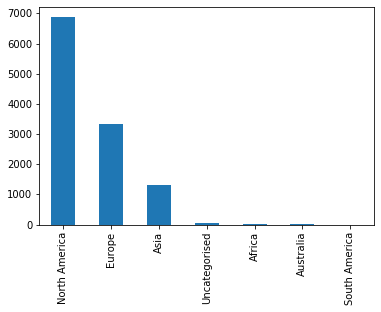

In [26]:
pd.value_counts(df['main_continent']).plot.bar()
pd.value_counts(df.main_continent)

## K-Means

**Convert the countries to be continent**

df['production_continent'] = df.production_region
production_continent =  df.production_continent

#north_america = [continent.north_america]
#south_america = [continent.south_america]
#europe = [continent.europe]
#africa = [continent.africa]
#asia = [continent.asia]
#australia = [continent.australia]
#antartica = [continent.antartica]
#uncategorised = [continent.uncategorised]

north_america = continent['north_america']
continent1 = production_continent.replace([north_america],'North America')

europe = continent['europe']
continent2 = continent1.replace([europe],'Europe')

df['production_continent'] = continent2

df[:1704]

# Production Country to Production Continent

In [21]:
df['production_country'] = df.production_region
reg = df['production_country']
df.head()

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_country,main_continent,production_country
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,Europe,French
110,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,tt6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,North America,English
111,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,tt6548,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,North America,English
113,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",tt6684,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,North America,English
116,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,tt7613,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,North America,English


In [22]:
df['production_continent'] = df.production_country

def conti(continent):
    na = []
    for land in continent:
        na.append(land)
    return na

north_america = conti(continent.north_america)
south_america = conti(continent.south_america)
europe = conti(continent.europe)
africa = conti(continent.africa)
asia = conti(continent.asia)
australia = conti(continent.australia)
antartica = conti(continent.antartica)
uncategorised = conti(continent.uncategorised)

b = []
for y in df.production_country:
    def Convert(string): 
        li = list(string.split(", ")) 
        return li 
    z = Convert(y)
    count = 0  
    c = []
    for x in z:
        if x in north_america:
            c.append('North America')
        elif x in south_america:
            c.append('South America')
        elif x in europe:
            c.append('Europe')
        elif x in africa:
            c.append('Africa')
        elif x in asia:
            c.append('Asia')
        elif x in australia:
            c.append('Australia')
        elif x in antartica:
            c.append('Antartica')
        elif x in uncategorised:
            c.append('Uncategorised')
        else: 
            c.append('Fehlerhaft')
    count = count +1
    b.append(c)
    
df.production_continent = b


    

In [23]:
df[df['production_region'].str.contains(" Old")]

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_country,main_continent,production_country,production_continent
17204,116716.xml,DER HERR DER RINGE DIE ZWEI TÜRME SPECIAL EXTE...,tt167261,"Action,Adventure,Drama",2002.0,"English, Sindarin, Old English",untokenisiert,179,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,English,North America,"English, Sindarin, Old English","[North America, Uncategorised, Europe]"
18136,226752.xml,Der Herr der Ringe Sméagol ! Ich hab einen ! I...,tt167260,"Adventure,Drama,Fantasy",2003.0,"English, Quenya, Old English, Sindarin",untokenisiert,201,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,English,North America,"English, Quenya, Old English, Sindarin","[North America, Uncategorised, Europe, Uncateg..."
23661,6858525.xml,Hrothgar ! Hrothgar ! Hrothgar ! Ich will Met ...,tt442933,"Action,Adventure,Animation",2007.0,"English, Old English",untokenisiert,115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,English,North America,"English, Old English","[North America, Europe]"
27121,4994297.xml,Outlander ( 2008 ) dTV - kabel eins - 6. April...,tt462465,"Action,Adventure,Sci-Fi",2008.0,"English, Norse, Old, Latin",untokenisiert,115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,English,North America,"English, Norse, Old, Latin","[North America, Europe, Uncategorised, Uncateg..."


### Production Continent Plot

In [104]:
from collections import Counter
prod_continent_frequs = Counter(df.production_continent)
print('There are', len(prod_continent_frequs), 'production continents where the Movies are produced')
prod_continent_frequs.most_common()

TypeError: unhashable type: 'list'

In [ ]:

#conti = df['production_continent']
#contine = conti.replace(['[continent.europe]','English'],['Europe','North America'])
#df['production_continent'] = contine

#df['production_continent'] = df.production_region
#production_continent = [df['production_continent']]
#replacements=[([north_america], 'North America'), ([europe],'Europe')]
#for pat,repl in replacements:
   # production_continent = re.sub(pat, repl, production_continent)
#df['production_continent'] = production_continent



#conti = []
#for con in df[production_continent]:
#    con
#df[production_continent]=df.production_region

#replace_values = {'[north_america]' : 'North America', '[europe]' : 'Europe' }
#production_continent = production_continent.replace({'production_continent': replace_values})
#production_continent

#df[production_continent] = replace_values[{'production_country' : {'[north_america]' : 'North America', '[europe]' : 'Europe' }}]


#north america
#north_america = continent['north_america']
#df['production_continent'] = df['production_country'].replace('north_america','South America')

#south america
#south_america = continent['south_america']
#df['production_continent'] = df['production_country'].replace([south_america],'South America')

#europe
#europe = continent['europe']
#df['production_continent'] = df['production_country'].replace([[europe],[north_america]],['Europe','North America'])

#africa
#africa = continent['africa']
#df['production_continent'] = df['production_country'].replace([africa],'Africa')

#asia
#asia = continent['asia']
#df['production_continent'] = df['production_country'].replace([asia],'Asia')

#australia
#australia = continent['australia']
#df['production_continent'] = df['production_country'].replace([australia],'Australia')

#antartica
#antartica = continent['antartica']
#df['production_continent'] = df['production_country'].replace([antartica],'Antratica')

#uncategorised
#uncategorised = continent['uncategorised']
#df['production_continent'] = df['production_country'].replace([uncategorised],'Uncategorised')

#df.head()

# Cluster Main Continent

### Divisional Main Continent  

red       6864
blue      3335
yellow    1307
grey        40
purple       6
orange       4
green        1
Name: colors, dtype: int64

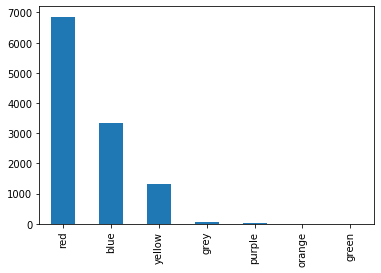

In [29]:
colors = []
for x in df.main_continent:
    if x == 'North America':
        colors.append('red')
    elif x == 'South America':
        colors.append('green')
    elif x == 'Europe':
        colors.append('blue')
    elif x == 'Africa':
        colors.append('purple')
    elif x == 'Asia':
        colors.append('yellow')
    elif x == 'Australia':
        colors.append('orange')
    elif x == 'Antartica':
        colors.append('pink')
    elif x == 'Uncategorised':
        colors.append('grey')
    else: 
        colors.append('white')
df['colors']=colors
      
df_clean = df[df.colors != 'white']
pd.value_counts(df_clean.colors).plot.bar() 
pd.value_counts(df_clean.colors)

In [28]:
tfidf = TfidfVectorizer(max_features=10000)
tokens = tfidf.fit_transform(df_clean.text)


In [30]:
tokens.toarray(), tokens.shape

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.00354427,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.00308994,
         0.00483548]]),
 (11557, 10000))

In [32]:
models = KMeans(n_clusters=7)
models.fit(tokens)

KeyboardInterrupt: 

In [ ]:
len(models.labels_)

In [ ]:
pca = PCA(n_components=7
pca.fit(tokens.todense())
X_tf = pca.transform(tokens.todense())

#Saving the temporal results into Dataframe
df_clean['pcatokens_1'] = X_tf[:,0]
df_clean['pcatokens_2'] = X_tf[:,1]
df_clean['pcatokens_3'] = X_tf[:,2]
df_clean['pcatokens_4'] = X_tf[:,3]
df_clean['pcatokens_5'] = X_tf[:,4]
df_clean['pcatokens_6'] = X_tf[:,5]
df_clean['pcatokens_7'] = X_tf[:,6]

df_clean['kmeanstokens'] = models.labels_

#Plot based on temporal results 
plt.figure(figsize=(15,8))
for d in dfs_clean.iterrows():
    a = d[1].pcatokens_1
    b = d[1].pcatokens_2
    c = d[1].pcatokens_3
    d = d[1].pcatokens_4
    e = d[1].pcatokens_5
    f = d[1].pcatokens_6
    g = d[1].pcatokens_7
    plt.plot(a, b, c, d , e , f, g, 'o', markersize=4, color= d[1].colors)
    plt.plot(a, b, c, d , e , f, g, marker=TextPath((-3, -3), f'{d[1].kmeanstokens}'), color='black', markersize=1)

In [33]:
import seaborn
import umap

In [35]:
from umap import UMAP 
reducer = UMAP()
Xr_tfidf = reducer.fit_transform(tokens)

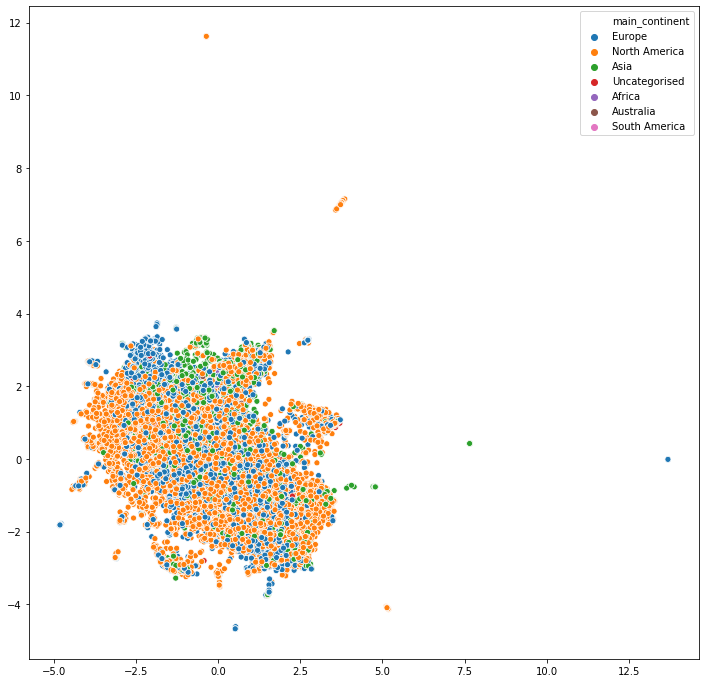

In [36]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df['main_continent'])
plt.show()

In [ ]:
df['labelcolor']=colorlist

In [ ]:
North_AmericaValue = 'North America'
EuropeValue = 'Europe'
North_America = df.production_continent = North_AmericaValue
Europe = df.production_continent = EuropeValue
production_continents = North_AmericaValue + EuropeValue
colorlist = []

for x in df.production_region:
    if x =='North America':
        colorlist.append('red')
    elif x =='Europe':
        colorlist.append('blue')
    else: 
        colorlist.append('white')

In [ ]:
pd.value_counts(dfs.colors).plot.bar() 
pd.value_counts(dfs.colors)

# K-Means

In [24]:
model = KMeans(n_clusters=8)
model.fit(embeddings)

NameError: name 'embeddings' is not defined

In [ ]:
len(model.labels_)

# Split without Embedding


In [ ]:
colors = []
for x in df.production_region:
    if x =='English':
        colors.append('red')
    elif x =='French':
        colors.append('blue')
    else: 
        colors.append('white')
dfs['colors']=colors

pd.value_counts(dfs.colors).plot.bar() 
pd.value_counts(dfs.colors)
